# Neural & Behavioral Modeling - Week 8 (Exercises)
by 楊士寬(r06521535@ntu.edu.tw)

In [3]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Replicate exisiting findings/models (10 points)

Based on your personal interest, please choose and replicate ONE of the following studies. You can replicate 1-2 core figures/tables instead of everything in the paper.

### 1.1 Embodied Cognition

1.1.1 Thelen, E., Schöner, G., Scheier, C., & Smith, L. B. (2001). The dynamics of embodiment: A field theory of infant perseverative reaching. Behavioral and Brain Sciences, 24(1), 1-86.

1.1.2 Schöner, G., & Thelen, E. (2006). Using dynamic field theory to rethink infant habituation. Psychological Review, 113(2), 273.

### 1.2 Instructed Learning

1.2.1 Biele, G., Rieskamp, J., & Gonzalez, R. (2009). Computational models for the combination of advice and individual learning. Cognitive Science, 33(2), 206-242.

1.2.2 Doll, B. B., Jacobs, W. J., Sanfey, A. G., & Frank, M. J. (2009). Instructional control of reinforcement learning: A behavioral and neurocomputational investigation. Brain Research, 1299, 74–94.

1.2.3 Li, J., Delgado, M. R., & Phelps, E. A. (2011). How instructed knowledge modulates the neural systems of reward learning. Proceedings of the National Academy of Sciences, U.S.A., 108, 55–60. (Their <a href=http://www.pnas.org/lookup/suppl/doi:10.1073/pnas.1014938108/-/DCSupplemental/sapp.pdf>supplementary document</a> contains more details about their model.)

1.2.4 Walsh, M. M., & Anderson, J. R. (2011). Modulation of the feedback-related negativity by instruction and experience. Proceedings of the National Academy of Sciences, U.S.A., 108, 19048–1905. (Their <a href=http://www.pnas.org/highwire/filestream/607302/field_highwire_adjunct_files/0/pnas.201117189SI.pdf>supplementary document</a> contains more details about their model.)

### 1.3 Sequence Memory

1.3.1 Henson, R. N. (1998). Short-term memory for serial order: The start-end model. Cognitive Psychology, 36(2), 73-137. (Here is a <a href=https://memory.psych.mun.ca/models/startend/js/>Javascript implementation</a>.)

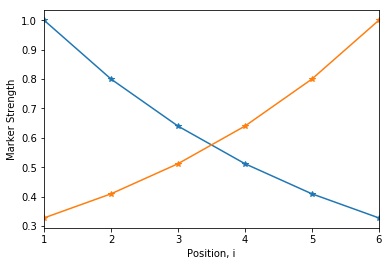

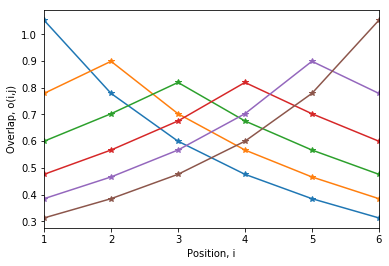

In [7]:
### Write your codes here
import numpy as np
import matplotlib.pyplot as plt
from math import exp

N = 6
S0,E0 = 1.0, 1.0 
S,E = 0.8, 0.8

x_list = [i for i in range(1,N+1)]
start_markers = [S0*S**(i-1) for i in range(1,N+1)]
end_markers  = [E0*E**(N-i) for i in range(1,N+1)]

plt.xlim((1,N))
plt.plot(x_list,start_markers,'-*')
plt.plot(x_list,end_markers,'-*')
plt.xlabel('Position, i')
plt.ylabel('Marker Strength')
plt.show()

position = list(zip(start_markers,end_markers))
#print (position)
oij= np.zeros((N,N))

for i in range(N):
    for j in range(N):
        summation = 0
        for k in range(len(position[i])):
            summation += (position[i][k]-position[j][k])**2
        oij[i,j] = (np.dot(position[i], position[j]))**0.5*exp(-(summation)**0.5)

plt.xlim((1,N))
plt.plot(x_list,oij,'-*')
plt.xlabel('Position, i')
plt.ylabel('Overlap, o(i,j)')
plt.show()

# Demonstration 1

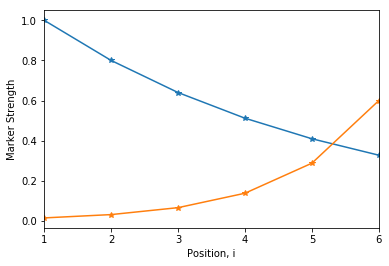

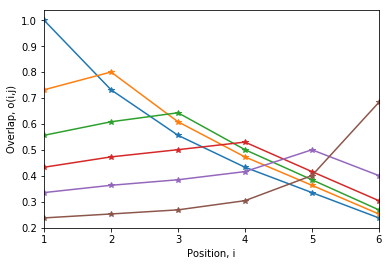

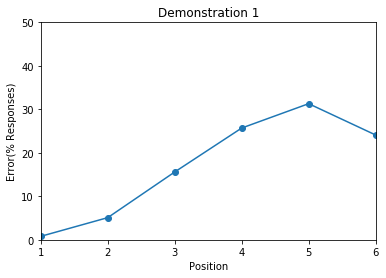

In [6]:
N = 6
S0,S = 1.0, 0.8
F0, F = 0.6, 0.6 
E0 = F0*S0
E = F*S
Gc = 0.08

x_list = [i for i in range(1,N+1)]
start_markers = [S0*S**(i-1) for i in range(1,N+1)]
end_markers  = [E0*E**(N-i) for i in range(1,N+1)]

plt.xlim((1,N))
plt.plot(x_list,start_markers,'-*')
plt.plot(x_list,end_markers,'-*')
plt.xlabel('Position, i')
plt.ylabel('Marker Strength')
plt.show()

position = list(zip(start_markers,end_markers))
#print (position)
oij= np.zeros((N,N))

for i in range(N):
    for j in range(N):
        summation = 0
        for k in range(len(position[i])):
            summation += (position[i][k]-position[j][k])**2
        oij[i,j] = (np.dot(position[i], position[j]))**0.5*exp(-(summation)**0.5)
        
list_oij = oij.tolist()
corect_recall = [list_oij[i].index(max(list_oij[i]))+1 for i in range(len(list_oij))]

plt.xlim((1,N))
plt.plot(x_list,oij,'-*')
plt.xlabel('Position, i')
plt.ylabel('Overlap, o(i,j)')
plt.show()


trial_time = 1000 #100000
error_recall = np.zeros((N,1))
for trial in range(trial_time):
    cij = np.zeros((N,N))
    ri = np.zeros((N,1))
    for i in range(N):
        for j in range(N):
            cij[i,j] = oij[i,j]*(1-ri[j]) + np.random.normal(loc=0.0, scale=Gc)
        list_cij = cij.tolist()
        k = list_cij[i].index(max(list_cij[i]))
        ri[k] = 1
        if k+1 != corect_recall[i]:
            error_recall[i] += 1
    
#plt.plot(x_list,cij,'-*')     

error_rate = [error_recall[i]/trial_time*100 for i in range(N)]
plt.xlim((1,N))
plt.ylim((0, 50))
plt.title("Demonstration 1")
plt.plot(x_list,error_rate,'-o')
plt.xlabel('Position')
plt.ylabel('Error(% Responses)')    
plt.show()